# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# I- Data Validation

## 1- Initializing and Analyzing DataFrame
The code imports the pandas library, loads a dataset into a DataFrame, displays the first 10 rows, shows DataFrame information, checks for missing values, and prints the number of unique values in each column.

In [1]:
# Import the pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv')

# Display the first 10 rows
print('Tthe first 10 rows of the DataFrame:')
print(df.head(10), '\n')

# Display information
print('Information about the DataFrame:')
print(df.info(), '\n')

# Check for missing values
print('Number of missing values in each column:')
print(df.isna().sum(), '\n')

# Print the number of unique values
print('The number of unique values in each column:')
print(df.nunique())


Tthe first 10 rows of the DataFrame:
   recipe  calories  carbohydrate  ...        category  servings high_traffic
0       1       NaN           NaN  ...            Pork         6         High
1       2     35.48         38.56  ...          Potato         4         High
2       3    914.28         42.68  ...       Breakfast         1          NaN
3       4     97.03         30.56  ...       Beverages         4         High
4       5     27.05          1.85  ...       Beverages         4          NaN
5       6    691.15          3.46  ...   One Dish Meal         2         High
6       7    183.94         47.95  ...  Chicken Breast         4          NaN
7       8    299.14          3.17  ...    Lunch/Snacks         4          NaN
8       9    538.52          3.78  ...            Pork         6         High
9      10    248.28         48.54  ...         Chicken         2          NaN

[10 rows x 8 columns] 

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeInde

## 2- Cleaning and Resetting DataFrame
The code drops rows with fewer than 4 non-missing values, resets the DataFrame's index, and verifies changes.

In [2]:
# Drop rows where there are fewer than 2 non-missing values
df.dropna(thresh=4, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the result
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        934 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      934 non-null    object 
 6   servings      934 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 58.5+ KB
None 



## 3- Processing and Checking Categories
The code prints initial categories, merges 'Chicken Breast' into 'Chicken', converts the column to a categorical type, and verifies changes.

In [3]:
# Print the unique values in the 'category' column before modifications
print("Before modification:", '\n',df['category'].unique(), '\n')

# Replace 'Chicken Breast' with 'Chicken'
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

# Convert the 'category' column to categorical datatype
df['category'] = df['category'].astype('category')

# Check the modifications
print("After modification:", '\n',df['category'].unique(), '\n')

# Confirm the change
print("Data type of 'category' column:", df['category'].dtype)


Before modification: 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert'] 

After modification: 
 ['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
Categories (10, object): ['Beverages', 'Breakfast', 'Chicken', 'Dessert', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'] 

Data type of 'category' column: category


## 4- Cleaning and Transforming the 'Servings' Column
The code cleans the 'servings' column by standardizing entries, converts it to integer type, and verifies the changes by displaying updated unique values.

In [4]:
# Print the unique values of the 'servings' column before modifications
print("Before modification:", df['servings'].unique(), '\n')

# Replace the values '4 as a snack' with '4' and '6 as a snack' with '6' in the 'servings' column
df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

# Convert the 'servings' column to an integer data type
df['servings'] = df['servings'].astype('int')

# Check the modifications
print("After modification:", df['servings'].unique(), '\n')

# Check the datatype of the 'servings' column
print("Data type of 'servings' column:", df['servings'].dtype)


Before modification: ['6' '4' '1' '2' '4 as a snack' '6 as a snack'] 

After modification: [6 4 1 2] 

Data type of 'servings' column: int64


## 5- Handling Missing Values in Target Column
The 'high_traffic' column serves as the target variable and comprises only 'High' and 'NaN' values. Since we can't discard all the missing values, we'll make an assumption that the 'NaN' values indicate the absence of 'High' traffic. Therefore, we'll replace 'High' with '1' and 'NaN' with '0' to represent non-high traffic.

In [5]:
# Replace the 'High' value with 1 in the 'high_traffic' column
df['high_traffic'].replace('High', 1, inplace=True)

# Replace NaN values with 0 in the 'high_traffic' column
df['high_traffic'].fillna(0, inplace=True)

# Convert the 'high_traffic' column to an integer data type
df['high_traffic'] = df['high_traffic'].astype('int')

# Check the modifications
print("Unique values in 'high_traffic':", df['high_traffic'].unique())

# Check the datatype
print("Data type of 'high_traffic' column:", df['high_traffic'].dtype)

Unique values in 'high_traffic': [1 0]
Data type of 'high_traffic' column: int64


## 6- Summary of Data Cleaning and Validation
The dataset initially contained **947** rows and **8** columns.

- The **'recipe'** column was already in the proper format, so no changes were necessary.
- The **'calories'**, **'carbohydrate'**, **'sugar'**, and **'protein'** columns, which are numeric (float) data types, **52 missing** entries were observed in each. These columns were left as **'float'**.
- The **'category'** column, which had no missing data, an unexpected eleventh category (**'Chicken Breast'**) was merged with the **'Chicken'** category. The data type of this column was set to **'category'**.
- The **'servings'** column was standardized by assuming **'4 as a snack'** and **'6 as a snack'** to represent **'4'** and **'6'** servings respectively and converting the column to **'int'** data type.
- The **'high_traffic'** column was **binarized** by replacing 'High' with '1' and 'NaN' with '0'. Before this, rows with 2 non-missing values were removed, totaling 13 rows.

After the cleaning and validation process, the dataset was refined to include **934** rows and **8** columns, with each of the 'calories', 'carbohydrate', 'sugar', and 'protein' columns now having **39 missing** values.


# II- Exploratory Analysis

## 1- Serving Size Analysis and Visualization
These visualizations provide insights into the distribution of serving sizes and how they might relate to the traffic received by the recipes.

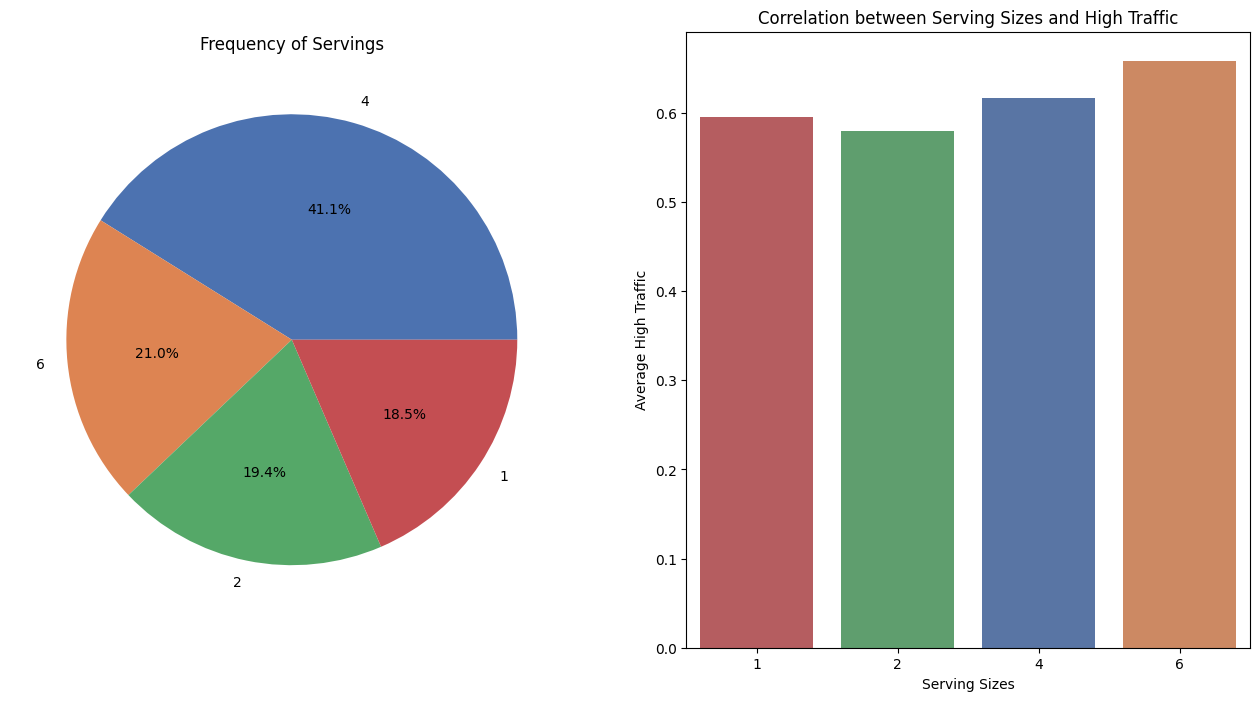

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each unique value in the 'servings' column
servings_counts = df["servings"].value_counts()

# Create a dictionary mapping serving sizes to specific colors
color_mapping = {serving: color for serving, color in zip(servings_counts.index, sns.color_palette("deep", len(servings_counts)))}

# Create a figure
plt.figure(figsize=(16, 8))

# Create the pie chart as the first subplot
plt.subplot(1, 2, 1)
pie_colors = [color_mapping[serving] for serving in servings_counts.index]
plt.pie(servings_counts, labels=servings_counts.index, colors=pie_colors, autopct='%1.1f%%')
plt.title("Frequency of Servings")

# Create the bar plot as the second subplot
plt.subplot(1, 2, 2)
sns.barplot(x='servings', y='high_traffic', data=df, palette=color_mapping, errorbar=None)
plt.xlabel('Serving Sizes')
plt.ylabel('Average High Traffic')
plt.title('Correlation between Serving Sizes and High Traffic')

# Show the plots
plt.show()

- The pie plot indicates that **4 servings** is the most common at **41.1%**. 
- The bar plot reveals a **positive trend** between **serving** sizes and average **high traffic**, with recipes serving 6 having the highest traffic. 
These insights could inform content strategies, such as featuring more **family-sized** meals. 
However, as the differences in traffic are relatively small, other factors may also be influential.

## 2- Category Distribution and Traffic Analysis
The first plot shows the frequency of categories, while the second plot further breaks down each category into high and low traffic.

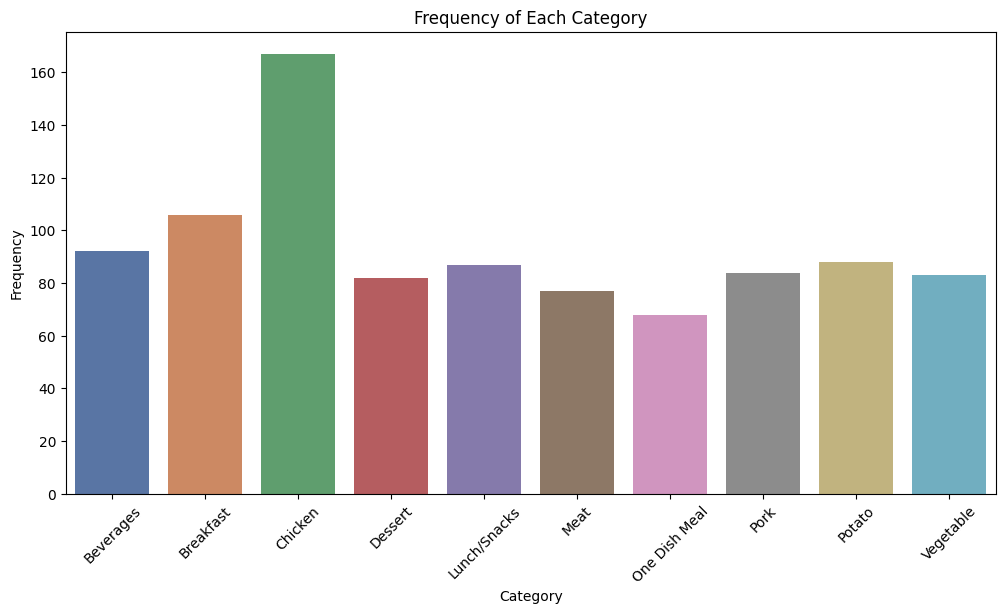

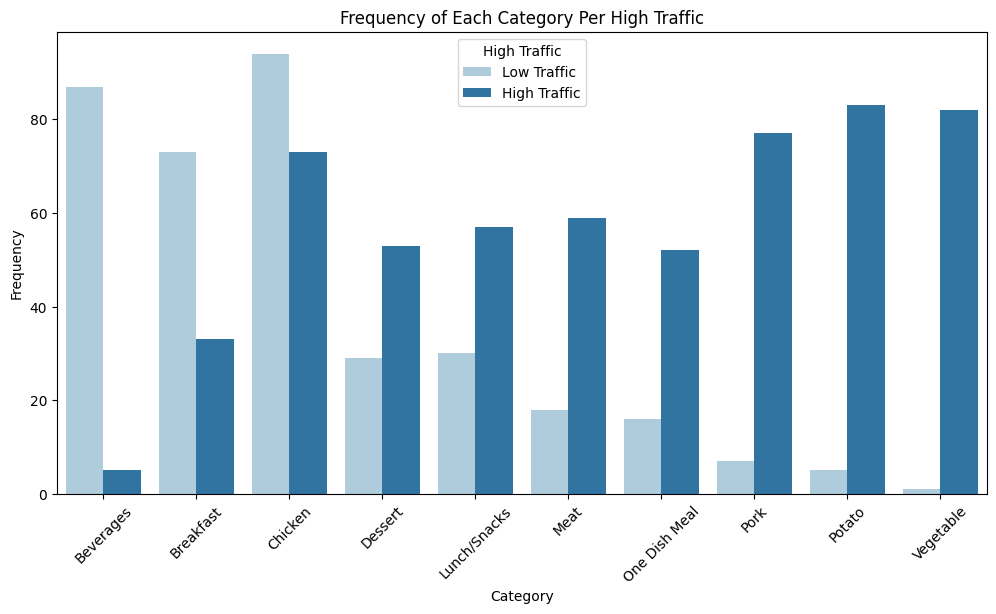

In [7]:
# Create a figure
plt.figure(figsize=(12, 6))

# Create the first subplot
sns.countplot(x='category', data=df, palette='deep')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')
plt.xticks(rotation=45)
plt.show()

# Custom palette
custom_palette = sns.color_palette("Paired")

# Create the second subplot
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='high_traffic', data=df, palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category Per High Traffic')
plt.xticks(rotation=45)
plt.legend(title='High Traffic', labels=['Low Traffic', 'High Traffic'])

# Display the plot
plt.show()


- The first plot shows the distribution of recipes across categories, with **'Chicken'** being the most **popular**. 
- The second plot adds traffic levels, revealing that **'Vegetable'**, '**Potato**' and '**Pork**' categories get **high** traffic, while **'Beverages'** is **less popular**. 
- '**Chicken**' is prevalent in the first plot but has a **balanced** traffic distribution in the second plot.

## 3- Nutritional Distributions Visualization

### a- Visualizing Nutritional Value Distributions
This code creates a boxplot to visually represent the distribution of **'nutritional'** values (calories, carbohydrates, sugar, and protein) for recipes. 

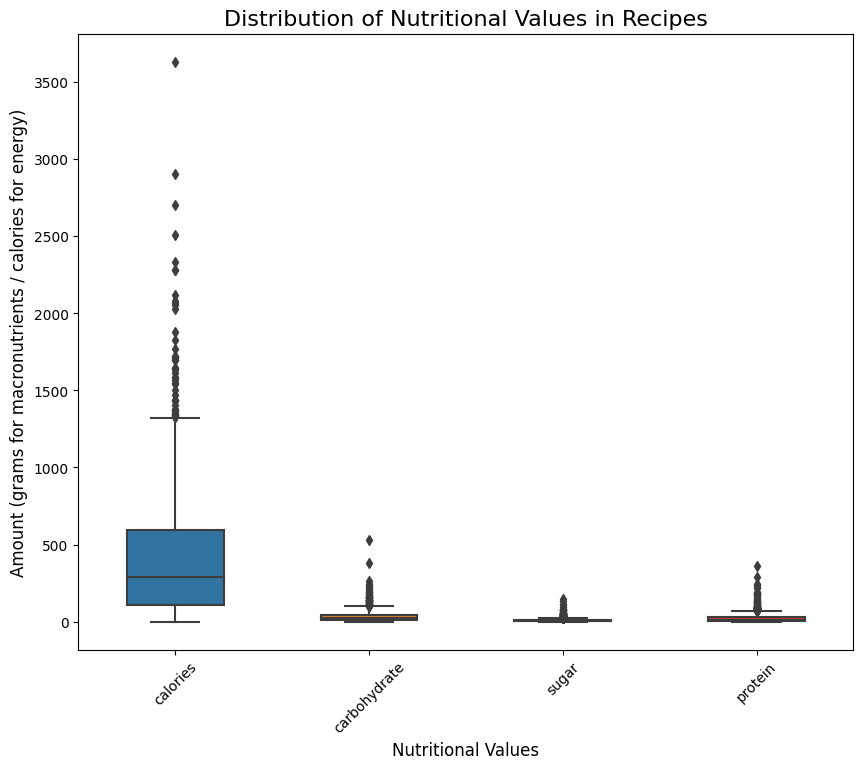

In [8]:
# Select the columns of interest
nutritional_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a plot
plt.figure(figsize=(10, 8))

# Create a box plot
sns.boxplot(data=df[nutritional_cols], width=0.5)
plt.title('Distribution of Nutritional Values in Recipes', fontsize=16)
plt.ylabel('Amount (grams for macronutrients / calories for energy)', fontsize=12)
plt.xlabel('Nutritional Values', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()

The dataset of **895** recipes reveals a **wide** distribution in nutritional values. **'Calories'** and **'protein'** exhibit **extensive** ranges with large spreads. **'Carbohydrates'** have a **moderately** wide range and spread, while sugar values are generally **lower** but with some high outliers. All four nutrients show a substantial number of **outliers** above the 75th percentile.

### b- Imputing Missing Values
Due to the presence of **outliers** in the **'calories'**, **'carbohydrate'**, **'sugar'**, and **'protein'** columns of a DataFrame, we will impute missing values with the **median** of each column, as it is less sensitive to outliers.
To avoid data **leakage**, this imputation will be performed separately on the training and validation/test datasets during the modeling process."

### c- Heatmap of Nutritional Values and Traffic Correlation
The code generates a heatmap displaying correlations between nutritional values ('calories', 'carbohydrate', 'sugar', 'protein') and high traffic.

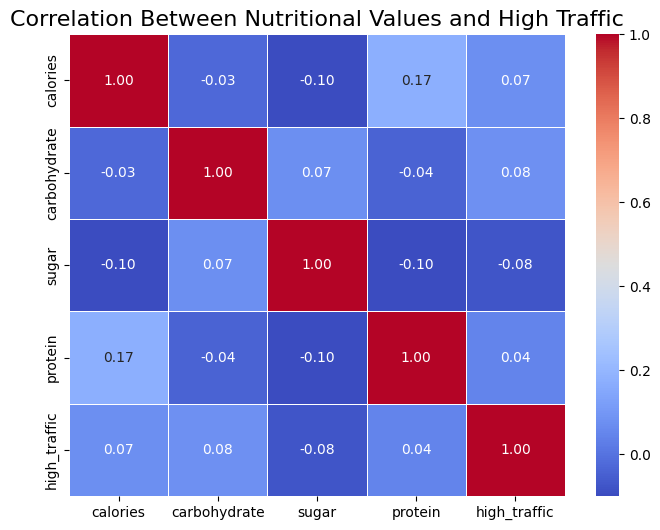

In [9]:
# Compute the correlation matrix
corr = df[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic',]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Between Nutritional Values and High Traffic', fontsize=16)

# Display the heatmap
plt.show()

**High traffic** recipes have **no strong** linear correlation with **calories**, **carbohydrates**, **sugar**, or **protein**.

# 4- Summary of Exploratory Analysis
The analysis shows that:
- recipes **serving 4** are **most common**, but **larger** serving sizes have **higher** traffic, indicating a preference for **family meals**. 
- **'Chicken'** is a **prevalent** category, but **'Vegetables'**, **'Potatoes'**, and **'Pork'** attract **more traffic**. 
- The dataset’s nutritional values have **wide** distributions and **outliers**; missing values will be  imputed with **medians** during modeling. 
- **No strong correlation** is observed between **nutritional** values and **traffic**.

# III- Model Development

## 1- What type of problem this is?
The given problem is a **binary classification** problem. The objective is to predict whether a recipe will lead to high traffic (popular) or not (unpopular) on the website.

I chose **Logistic Regression** as a baseline model and **Random Forest Classifier** as a comparison model for the following reasons:

- **Logistic Regression** is excellent for **binary classification**. It is **interpretable**, **fast**, and **doesn't** require a lot of computational resources, making it an **efficient choice** for datasets with **linear relationships**. However, its pros are that it struggles with **non-linear** relationships, is sensitive to **outliers**, and requires **feature scaling** for optimal performance.

- **Random Forest Classifier** excels at tackling **complex classification** tasks. It is **robust**, capable of capturing **non-linear** relationships, and provides **insights** into feature importance, though at the expense of **higher** computational cost and memory usage, making it a **powerful choice** for intricate datasets. However, its cons include being **less** interpretable than logistic regression, and requiring careful **hyperparameter** tuning to achieve the best performance.

## 2- Preparing the data for Model Training

This code performs **one-hot encoding** on the **'category'** column and selects the features.

In [10]:
# Perform one-hot encoding on the 'category' column
df = pd.get_dummies(df, columns=['category'], prefix='cat')


In [11]:
# Select the specified columns as features and target variable
X = df.drop(['recipe','high_traffic'],axis=1)
y = df['high_traffic']

This code sets the seed for reproducibility and splits the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split
seed=456
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## 3- Fitting a baseline model
The code scales features, trains a Logistic Regression model, makes predictions on test data, and evaluates model accuracy.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create an imputer
imputer_lr = SimpleImputer(strategy='median')

# Create a scaler
scaler_lr = StandardScaler()

# Instantiate the LogisticRegression model
logreg = LogisticRegression(random_state=seed)

# Create a pipeline
pipeline_lr = Pipeline([
    ('imputer', imputer_lr),
    ('scaler', scaler_lr),
    ('classifier', logreg)
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_lr = pipeline_lr.predict(X_test)

# Compute and print the evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}")


Logistic Regression - Accuracy: 0.81


The output indicates that **Logistic Regression** model achieved an accuracy of **81%** on the test data, which is a **good result** especially if we are aiming for an accuracy of at least 80%.

## 4- Fitting a comparison model
The code trains a Random Forest Classifier using a pipeline, makes predictions on the test set, and calculates the accuracy by comparing the predicted labels with the actual labels.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create an imputer
imputer_rf = SimpleImputer(strategy='median')

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=seed)

# Create a pipeline
pipeline_rf = Pipeline([
    ('imputer', imputer_rf),
    ('classifier', rf)
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Compute and print the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

Random Forest - Accuracy: 0.80


### Hyper parameters tuning 

In [15]:
# Instantiate the Random Forest Classifier with specified parameters
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=seed
)

# Create a pipeline
pipeline_rf = Pipeline([
    ('imputer', imputer_rf),
    ('classifier', rf)
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Compute and print the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")

Random Forest - Accuracy: 0.81


After tuning **Random Forest Classifier** model achieved an accuracy of **81%** on the test data, which is a **good result**, especially considering the aim was to achieve an accuracy of at least 80%.

## 5- Model evaluation

### a- Logistic Regression model

### Other metrics

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, log_loss, classification_report

# Now you can make predictions
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression - Confusion Matrix: \n{confusion_mat_lr}")

# Compute precision score
precision_lr = precision_score(y_test, y_pred_lr)
print(f"Logistic Regression - Precision: {precision_lr:.2f}")

# Compute recall score
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Logistic Regression - Recall: {recall_lr:.2f}")

# Compute F1 score
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - F1 Score: {f1_lr:.2f}")

# Compute AUC-ROC score
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression - AUC-ROC Score: {auc_roc_lr:.2f}")

# Compute Log Loss
logloss_lr = log_loss(y_test, y_pred_proba_lr)
print(f"Logistic Regression - Log Loss: {logloss_lr:.2f}")

# Compute and print the classification report
report_lr = classification_report(y_test, y_pred_lr)
print(f"Logistic Regression - Classification Report: \n{report_lr}")


Logistic Regression - Confusion Matrix: 
[[52 15]
 [21 99]]
Logistic Regression - Precision: 0.87
Logistic Regression - Recall: 0.82
Logistic Regression - F1 Score: 0.85
Logistic Regression - AUC-ROC Score: 0.87
Logistic Regression - Log Loss: 0.42
Logistic Regression - Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        67
           1       0.87      0.82      0.85       120

    accuracy                           0.81       187
   macro avg       0.79      0.80      0.79       187
weighted avg       0.81      0.81      0.81       187



From these metrics, The **Logistic Regression** model has a high precision of **0.87** and recall of **0.82**, indicating effective classification. Its **AUC-ROC** score of **0.87** and **F1 score** of **0.85** reflect its ability to **competently** distinguish between classes.

### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_logreg = cross_val_score(pipeline_lr, X, y, cv=5)

# Output the cross-validation scores
print("Logistic Regression - Cross-validation scores:", cv_scores_logreg)

# Output the mean and standard deviation of the cross-validation scores
print("Logistic Regression - Mean CV score:", cv_scores_logreg.mean())
print("Logistic Regression - Standard deviation of CV scores:", cv_scores_logreg.std())


Logistic Regression - Cross-validation scores: [0.74331551 0.72727273 0.76470588 0.80748663 0.77419355]
Logistic Regression - Mean CV score: 0.7633948594100397
Logistic Regression - Standard deviation of CV scores: 0.027460530113128843


The **Logistic Regression** model exhibits a **mean** accuracy of approximately **76.34%** with a standard deviation of **0.0275** across 5 folds, indicating **reasonably** consistent performance and suggesting that the model is **not overfitting** and should generalize well to new data.

### b- Random Forest Classifier

### Other metrics

In [18]:

# Predict the probabilities for the test set using the Random Forest pipeline
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Compute the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest - Confusion Matrix: \n{confusion_mat_rf}")

# Compute precision score
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.2f}")

# Compute recall score
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest - Recall: {recall_rf:.2f}")

# Compute F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

# Compute AUC-ROC score
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest - AUC-ROC Score: {auc_roc_rf:.2f}")

# Compute Log Loss
logloss_rf = log_loss(y_test, y_pred_proba_rf)
print(f"Random Forest - Log Loss: {logloss_rf:.2f}")

# Compute and print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest - Classification Report: \n{report_rf}")


Random Forest - Confusion Matrix: 
[[ 50  17]
 [ 18 102]]
Random Forest - Precision: 0.86
Random Forest - Recall: 0.85
Random Forest - F1 Score: 0.85
Random Forest - AUC-ROC Score: 0.87
Random Forest - Log Loss: 0.43
Random Forest - Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        67
           1       0.86      0.85      0.85       120

    accuracy                           0.81       187
   macro avg       0.80      0.80      0.80       187
weighted avg       0.81      0.81      0.81       187



The **Random Forest Classifier** model has high precision and recall, indicating **effective** classification. Its **AUC-ROC** score of **0.87** and **F1 score** of **0.85** reflect its ability to **reliably** distinguish between classes.

### Cross Validation

In [19]:
# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(pipeline_rf, X, y, cv=5)

# Output the cross-validation scores
print("Random Forest - Cross-validation scores:", cv_scores_rf)

# Output the mean and standard deviation of the cross-validation scores
print("Random Forest - Mean CV score:", cv_scores_rf.mean())
print("Random Forest - Standard deviation of CV scores:", cv_scores_rf.std())


Random Forest - Cross-validation scores: [0.72727273 0.7486631  0.72727273 0.75935829 0.75268817]
Random Forest - Mean CV score: 0.7430510033925593
Random Forest - Standard deviation of CV scores: 0.013328212310325641


The **Random Forest Classifier** model exhibits a mean accuracy of approximately **74.31%** with a **low standard deviation** of 0.0133 across 5 folds, indicating **consistent** performance and suggesting that the model is **not overfitting** and should generalize well to new data.

## 6- Comparing model evaluation

- Both models have very similar performance across different metrics. 
- **Logistic Regression** performs slightly **better** in terms of **precision** and **log loss**.
- **Random Forest Classifier** has a slightly **higher** **recall** and **F1 score**. 
- In terms of **cross-validation** mean accuracy, **Logistic Regression** performs slightly **better**.

## 7- Feature Importances

### a- Logistic Regression

              Feature  Coefficient
0            calories    -0.020755
1        carbohydrate     0.021318
2               sugar    -0.100870
3             protein     0.018606
4            servings     0.067456
5       cat_Beverages    -0.952919
6       cat_Breakfast    -0.460540
7         cat_Chicken    -0.421526
8         cat_Dessert    -0.030737
9    cat_Lunch/Snacks    -0.061926
10           cat_Meat     0.113537
11  cat_One Dish Meal     0.091727
12           cat_Pork     0.426201
13         cat_Potato     0.606817
14      cat_Vegetable     0.930423


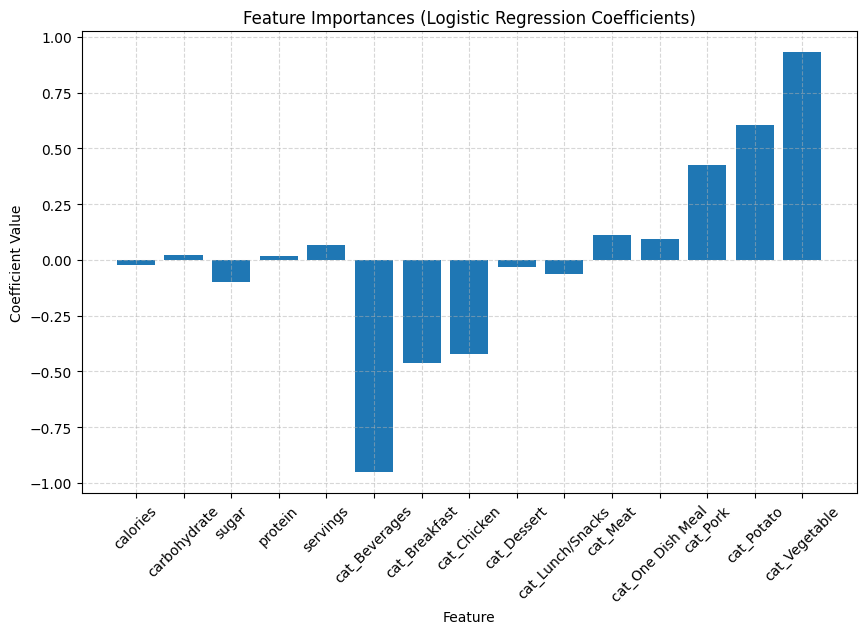

In [20]:
# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline_lr.named_steps['classifier']

# Retrieve the feature names
feature_names = X_train.columns

# Retrieve the coefficients
coefficients = logreg_model.coef_[0]

# Map coefficients to feature names
feature_importances = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the **Linear Regression** model's coefficients:
1. **Pork**, **Potato**, and **Vegetable** have substantial **positive** coefficients, implying recipes in these categories tend to have high traffic. **carbohydrate**, **protein**, **servings**, **Meat** and **One Dish Meal** also have positive but less significant coefficients.

2. **Beverages**, **Breakfast**, and **Chicken** have considerable **negative** coefficients, suggesting lower high traffic in these categories. **calories**, **sugar**, **Dessert**, and **Lunch/Snacks** also have a negative impact, but to a lesser extent.


### b- Random Forest Classifier

              Feature  Importance
0            calories    0.119451
1        carbohydrate    0.107989
2               sugar    0.115653
3             protein    0.161988
4            servings    0.036355
5       cat_Beverages    0.137840
6       cat_Breakfast    0.073891
7         cat_Chicken    0.060522
8         cat_Dessert    0.009153
9    cat_Lunch/Snacks    0.011436
10           cat_Meat    0.010158
11  cat_One Dish Meal    0.007015
12           cat_Pork    0.032963
13         cat_Potato    0.047246
14      cat_Vegetable    0.068339


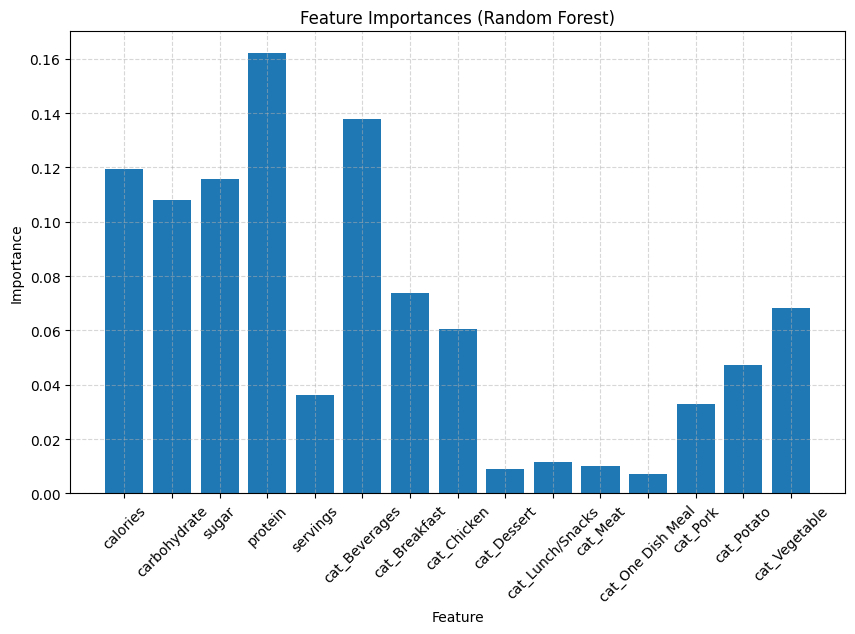

In [21]:
# Retrieve the Random Forest model from the pipeline
rf_model = pipeline_rf.named_steps['classifier']

# Retrieve the feature names
feature_names = X_train.columns

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Map feature importances to feature names
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the **Random Forest Classifier** model's feature importances:
- **calories**, **carbohydrate**, **sugar**, **protein**, and **beverages** appear to be **highly** important.
- **servings**, **Breakfast**, **Chicken**, **Pork**, **Potato**, and **Vegetable** seem to be **moderately** important.
- **Dessert**, **Lunch/Snacks**, **Meat**, and **One Dish Meal** are **less** important.

**Note** that Random Forest Classifier **doesn't** indicate whether the feature importances are **positive** or **negative**.

## 8- Conclusion
Considering that both models exhibit **similar** performance across various metrics, with Logistic Regression slightly **outperforming** in terms of mean accuracy from cross-validation, as well as the insights from feature importances and **exploratory** analysis, I **recommend** opting for the **Logistic Regression model**.

# V- Definition of a metric for the business to monitor

I recommend using the "**Recipe Exposure Rate**" (**RER**) as a key performance indicator to understand how well the platform is maximizing the exposure of recipes during high traffic times. This can be calculated using the formula:

$\text{RER (%)} = \left(\frac{\text{Number of times recipe exposed during high traffic}}{\text{Total number of times recipe shown}}\right) \times 100$


## 1- How should the business monitor what they want to achieve?

To use the Recipe Exposure Rate (RER) for monitoring business goals, Tasty Bytes should:
- **Calculate** RER, set an RER **threshold** for popular recipes (e.g. 80%) and continuously monitor it. 
- If the RER **falls** below the threshold, **adjustments** should be made in recipe selection.
-  Additionally, the impact of RER on **traffic** and **subscriptions** should be evaluated. 
-  **Adjustments** should be based on whether changes in RER **correlate** with changes in website traffic and subscriptions.

## 2- Estimate the initial value(s) for the metric based on the current data?

In [23]:
# Calculate the RER
total_recipes = len(df)
high_traffic_recipes = df['high_traffic'].sum()
recipe_exposure_rate = (high_traffic_recipes / total_recipes) * 100

# Print the RER
print(f'Recipe Exposure Rate: {recipe_exposure_rate:.2f}%')

Recipe Exposure Rate: 61.46%


Based on the given data, with a Recipe Exposure Rate (RER) of **61.46%**, it is evident that Tasty Bytes is **not reaching** the desired threshold of **80%** that they aim for in terms of exposing popular recipes during high traffic times.

# VI- Final summary

## 1- Summary 

- The dataset consisted of **947** rows and 8 columns. 
    - After cleaning it was reduced to **934** rows. 
    - The numerical columns had missing values, which were imputed with **medians**. 
    - **'Chicken Breast'** was merged with **'Chicken'** under the 'category' column, 
    - The **'high_traffic'** column was **binarized**. 

- Exploratory analysis revealed that:
    - Recipes serving **larger groups** have higher traffic
    - The 'Chicken' category was prevalent.
    - **'Vegetables'**, **'Potatoes'**, and **'Pork'** attracted more traffic. 
    - There were **no strong** correlations between nutritional values and traffic.

- For feature importances:
    - **Logistic Regression** showed substantial **positive** impact for categories like **'Vegetable'**, **'Potato'**, and **'Pork'** while **'Beverages'**, **'Breakfast'**, and **'Chicken'** showed significant **negative** impact.
    - **Random Forest Classifier** highlighted significant importance for **calories**, **carbohydrate**, **sugar**, **protein**, and **beverages**.


- Compairing the two models:
    - Both models, **Logistic Regression** and **Random Forest Classifier**, show similar performance across different metrics. 
    - However, **Logistic Regression** is preferred due to its feature importances aligning more closely with the insights from exploratory analysis, in addition to its other advantages."

- Key metric:
    - I suggest adopting "**Recipe Exposure Rate**" (**RER**) as the primary performance metric.
    - **Compute** RER, **establish** a threshold (e.g. 80%), and **monitor**. 
    - Make recipe **adjustments** if RER dips below the threshold and evaluate its impact on traffic and subscriptions. 
    - Base **modifications** on the correlation between changes in RER, traffic, and subscriptions.


## 2- Recommendations

Based on all the previous analysis, I recommend the following strategies:

1. **Promote Categories with Positive Impact**: Place emphasis on the **'Pork'**, **'Potato'**, and **'Vegetable'** categories in recipes, as these have shown to lead to high traffic.

2. **Reevaluate Underperforming Categories**: Analyze and reassess the content and presentation of categories such as **'Beverages'**, **'Breakfast'**, and **'Chicken'**, which are underperforming.

3. **Optimize Serving Sizes**: There is a **positive trend** between serving sizes and high traffic. Consider optimizing the serving sizes in recipes to make them more appealing.

4. **Time-based Exposure**: Adapt the timing of recipe exposure by showcasing recipes relevant to the time of day, such as displaying breakfast recipes in the morning and lunch/snack recipes around lunchtime.

5. **Regular Model Testing**: Periodically test the models with the most recent data and align its predictions on high traffic recipes with estimations, ensuring a data-driven approach to recipe exposure."

6. **Monitor and Optimize Recipe Exposure Rate (RER) as a Key Metric**: 
- **Compute** and track RER regularly, set a benchmark (e.g., 80%). 
- If RER falls below this, **adjust** recipe selection. 
- **Analyze** RER's effect on traffic and make data-driven adjustments based on the correlation between RER changes and traffic variations.

Implementing these recommendations could help in enhancing the website's performance and user engagement.

## Show how the two models compare

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation